<a href="https://colab.research.google.com/github/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas (imports) e Macros

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
new_cols = {}
new_cols_test = {}
remove_cols = set()

# EDA

## Panorama

In [454]:
# ler train.csv
df = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/train.csv',
                 index_col = 0)

df_test = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/test.csv',
                    index_col = 0)

# verificar numero de linhas e colunas
df.shape

(1460, 80)

Demos load tanto no Df, quanto no Df_test.</br>
Todas as analises sao realizadas em Df, todas as alteracoes e normalizacoes sao realizadas tanto em Df, quanto em Df_test.</br>
A razão para isto é que o código iria quebrar se trocassemos a variavel para test, visto que saleprice é usado em diversos momentos.

In [455]:
# Uma primeira visualizacao dos dados
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [456]:
# Verificar colunas, número de entradas não nulas e tipo das colunas
# Batendo dados com o dicionário: https://github.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/data_description.txt
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Pontos de Atenção:
- MSSubClass é categórico
- Street é binário [Grvl/Pave]
- OverallQual é uma nota (likert)
- OverallCond é uma nota (likert)
- CentralAir é binário [N/Y]

Colunas com muitos nulos:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

In [457]:
# transformar numeros que representam categorias em objetos
# df[['MSSubClass', 'OverallQual', 'OverallCond']] =
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

In [458]:
# listar apenas as colunas que possuem valores nulos
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Sera estudado caso a caso para saber se removemos ou não.
As colunas binárias serão tratadas junto com as demais categoricas se necessário alguma camada de encoding.

In [459]:
# Examinando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [460]:
# Examinando colunas categóricas
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


## Hipoteses

### Testar se há relacao entre:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

In [461]:
# LowQualFinSF is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['LowQualFinSF'] ).sort_values()

Id
126      286
171      326
534      334
1101     438
52       456
        ... 
1170    3627
692     4316
1183    4476
524     4676
1299    5642
Length: 1460, dtype: int64

In [462]:
# GrLivArea is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['GrLivArea'] ).sort_values()

Id
186    -572
171    -528
636    -515
1010   -514
89     -513
       ... 
490       0
489       0
488       0
486       0
1460      0
Length: 1460, dtype: int64

In [463]:
# GrLivArea is equal the sum of the rest?
( df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] - df['GrLivArea'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

GrLivArea é a soma de 1stFlrSF, 2ndFlrSF e LowQualFinSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes.

Posteriormente, podemos eliminar a variavel, se quisermos.

In [464]:
# df = df.drop(columns= 'GrLivArea')
# df_test = df_test.drop(columns= 'GrLivArea')
# remove_cols.add('GrLivArea')

### Testar se há relacao entre:
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

In [465]:
# TotalBsmtSF is equal the sum of the rest?
( df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF'] - df['TotalBsmtSF'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

TotalBsmtSF é a soma de BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes.

Posteriormente, podemos eliminar a variavel, se quisermos.

In [466]:
# df = df.drop(columns= 'TotalBsmtSF')
# df_test = df_test.drop(columns= 'TotalBsmtSF')
# remove_cols.add('TotalBsmtSF')

Funcao preencher nulos

In [467]:
#funcao preencher nulos. Primeiro verifica se a coluna é numérica ou categórica, depois preenche com 0, caso seja numerico
#ou com 'N/A' por default, mas aceitando outros valores como parametro
def preencher_nulos(df, col, valor, df_name):
    #primeiro verifica se a coluna tem valores nulos
    aux = df[col].isnull().sum()
    if aux > 0:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(valor)
        else:
            df[col] = df[col].fillna(0)
            valor = 0
    print('Coluna', col, 'preenchida com', valor, 'em', aux, 'entradas no dataset', df_name)

Funcao para printar os dados mais importantes para analise, também preenche nulos

In [468]:
def print_unique_values(col, df1, df2, valor='N/A', other_cols=[], preencher=True):
    # Chamar função preencher_nulos em ambos os dataframes
    if preencher:
        preencher_nulos(df1, col, valor, 'Treino')
        preencher_nulos(df2, col, valor, 'Teste')
    
    data = []
    for i in df1[col].unique():
        count = df1[df1[col] == i]['SalePrice'].count()
        price_mean = df1[df[col] == i]['SalePrice'].mean()
        price_std = df1[df1[col] == i]['SalePrice'].std()
        price_area_mean = price_mean / df1[df1[col] == i]['LotArea'].mean()
        price_area_std = price_std / df1[df1[col] == i]['LotArea'].std()
        other_cols_mean = [df1[df1[col] == i][c].mean() for c in other_cols]
        data.append([i, count, price_mean, price_std, price_area_mean, price_area_std, *other_cols_mean])
    
    headers = [col, "Count", "Price", "Std", "Area_Price", "Std/Area", *other_cols]
    result_df = pd.DataFrame(data, columns=headers)
    
    # Ordenar o DataFrame pelo valor da coluna 'Mean' em ordem decrescente
    result_df = result_df.sort_values(by='Price', ascending=False)
    
    display(result_df)


## Colunas com muitos nulos

#### PoolQC e PoolArea(1453 nulos)

In [469]:
print_unique_values('PoolQC', df, df_test)

Coluna PoolQC preenchida com N/A em 1453 entradas no dataset Treino
Coluna PoolQC preenchida com N/A em 1456 entradas no dataset Teste


,PoolQC,Count,Price,Std,Area_Price,Std/Area
1,Ex,2,490000.000000,360624.458405,23.877979,52.062066
2,Fa,2,215500.000000,48790.367902,16.062910,10.531136
3,Gd,3,201990.000000,63441.392639,6.483944,2.205103
0,N/A,1453,180404.663455,78168.872519,17.252937,7.900881


Mesmo havendo uma diferenca de preco entre as casas com e sem piscina, o fato de apenas 7 casas possuirem piscina pode nao ser suficiente para justificar a coluna.
Acreditamos que haverão outros fatores que influenciam mais no preço da casa, como por exemplo a localização, o tamanho da casa, etc.

In [470]:
df = df.drop(columns= 'PoolQC')
df_test = df_test.drop(columns= 'PoolQC')
remove_cols.add('PoolQC')
#remover tambem a coluna PoolArea
df = df.drop(columns= 'PoolArea')
df_test = df_test.drop(columns= 'PoolArea')
remove_cols.add('PoolArea')

In [471]:
#lista de dropcol
remove_cols

{'PoolArea', 'PoolQC'}

#### MiscFeature (1406 nulos)

In [472]:
# Os valores representam outas caracteristicas nao representadas em outra colunas. No dicionario:
# MiscFeature: Miscellaneous feature not covered in other categories
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF) -> barracão
#        TenC	Tennis Court
#        NA	None
print_unique_values('MiscFeature', df, df_test)


Coluna MiscFeature preenchida com N/A em 1406 entradas no dataset Treino
Coluna MiscFeature preenchida com N/A em 1408 entradas no dataset Teste


,MiscFeature,Count,Price,Std,Area_Price,Std/Area
4,TenC,1,250000.000000,NaN,14.977235,NaN
0,N/A,1406,182046.410384,80084.136570,17.666982,9.536671
2,Gar2,2,170750.000000,27223.611076,10.785800,6.292906
1,Shed,49,151187.612245,51642.728056,9.253498,1.697776
3,Othr,2,94000.000000,55154.328933,10.595131,11.919315


Como há poucos valores para outras categorias alem de Shed (barracão),Vamos trocar a coluna para shed </br>
Os demais valores foram substituidos por N.

In [473]:
#trocar nome da coluna MiscFeature de df e df_test para Shed
df = df.rename(columns={'MiscFeature': 'Shed'})
df_test = df_test.rename(columns={'MiscFeature': 'Shed'})

#trocar tambem todos os demais valores para N/A
df['Shed'] = df['Shed'].replace(['Gar2', 'Othr', 'TenC'], 'N/A')

In [474]:
#printar df shed
df.Shed.value_counts()

N/A     1411
Shed      49
Name: Shed, dtype: int64

#### Alley (1369 nulos)

In [588]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# Alley: Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
print_unique_values('Alley', df, df_test)

Coluna Alley preenchida com N/A em 0 entradas no dataset Treino
Coluna Alley preenchida com N/A em 0 entradas no dataset Teste


,Alley,Count,Price,Std,Area_Price,Std/Area
0,2,1369,183452.131483,80667.145180,17.126859,7.876737
2,1,41,168000.585366,38370.375243,28.220585,11.728486
1,0,50,122219.080000,34780.780734,13.682517,11.937473


In [476]:
#verificar quantos N/A existem em Alley
df['Alley'].isnull().sum()

0

In [477]:
#verificar quantos N/A existem em Alley
df_test['Alley'].isnull().sum()

0

Existe uma relação entre ter um Alley, e seus respectivos valores, porem, a mesma relacao nao é tao forte quando se trata de Mean/Area.

Mesmo assim, optamos por preencher os dados da seguinte maneira:

In [478]:
#Fazer map para transformar Alley em numerico, com Grvl=0, Pave=1 e N/A=2
df['Alley'] = df['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})
df_test['Alley'] = df_test['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})

#### Fence (1179 nulos)

In [479]:
#verificar presenca de nans em df_test de Fence
df_test['Fence'].isnull().sum()

1169

In [480]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fence
print_unique_values('Fence', df, df_test)

Coluna Fence preenchida com N/A em 1179 entradas no dataset Treino
Coluna Fence preenchida com N/A em 1169 entradas no dataset Teste


,Fence,Count,Price,Std,Area_Price,Std/Area
0,N/A,1179,187596.837998,81656.497075,17.461167,7.431582
3,GdPrv,59,178927.457627,56757.237563,17.007848,13.531945
1,MnPrv,157,148751.089172,66096.069463,16.160765,23.557028
2,GdWo,54,140379.314815,53592.585059,14.571211,19.416793
4,MnWw,11,134286.363636,21781.805376,14.516018,7.275206


Casas sem cerca sao mais valiosas que casas com cerca. 
Acreditamos que este dataset não contem erros, e por isto, podem significa estar em uma area mais nobre/condomonio com regras.
De toda forma, decidir dar um Map nessas informacoes, transformando Os valores MnWw, GdWo, MnPrv em 1, GdPrv em 2, N/A em 3.

In [481]:
#transformar Fence em numerico, com MnWw=1, GdWo=1, MnPrv=1, GdPrv=2 e N/A=3
df['Fence'] = df['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})
df_test['Fence'] = df_test['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})

#### LotFrontage (259 nulos)

<Axes: ylabel='Frequency'>

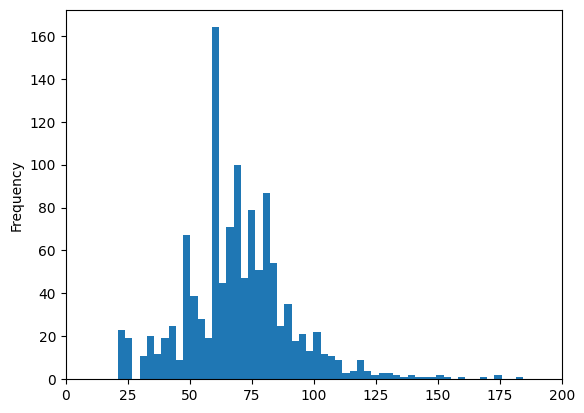

In [482]:
# como é uma variavel numerica, vamos avaliar a distribuicao, mostar apenas dados entre 0 e 200.
df.LotFrontage.plot.hist(bins=100, xlim=(0,200))

In [483]:
#criar uma coluna com a raiz quadrada de lotarea
df['LotArea_sqrt'] = np.sqrt(df['LotArea'])

#qual é a soma de todos os valores LotArea_sqrt e a soma de todos os valores LotArea para dados com LotFrontage > 0?
df[df['LotFrontage'] > 0][['LotFrontage', 'LotArea_sqrt']].sum()



LotFrontage      84130.000000
LotArea_sqrt    115956.326907
dtype: float64

<Axes: >

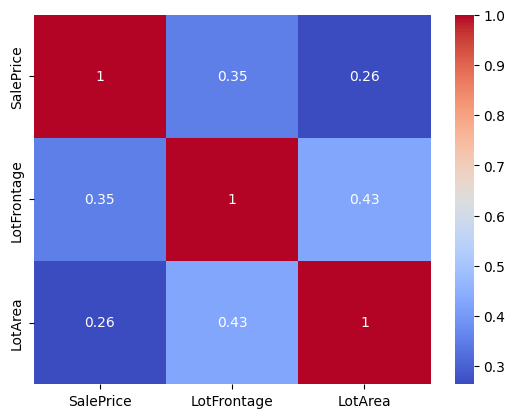

In [484]:
#heatmap sales, lotfrontage e lotarea
sns.heatmap(df[['SalePrice', 'LotFrontage', 'LotArea']].corr(), annot=True, cmap='coolwarm')

In [485]:
#chamar funcao ver dados
print_unique_values('LotFrontage', df, df_test, 0, ['LotArea', 'Alley'], False)

,LotFrontage,Count,Price,Std,Area_Price,Std/Area,LotArea,Alley
106,160.0,1,745000.000000,NaN,47.686104,NaN,15623.000000,2.0
95,104.0,3,473333.333333,287677.481450,30.594217,53.662205,15471.333333,2.0
76,118.0,2,415000.000000,296984.848098,16.779880,19.042437,24732.000000,2.0
79,150.0,1,375000.000000,NaN,1.742201,NaN,215245.000000,2.0
54,107.0,7,342947.571429,167045.554493,27.191548,92.137793,12612.285714,2.0
...,...,...,...,...,...,...,...,...
26,33.0,1,113000.000000,NaN,25.359066,NaN,4456.000000,2.0
36,21.0,23,94278.260870,13823.035995,54.603143,74.550910,1726.608696,2.0
93,45.0,3,80500.000000,31036.269106,9.774162,1493.233194,8236.000000,0.0
109,153.0,1,52500.000000,NaN,12.748907,NaN,4118.000000,0.0


Valores nulos antes: 259
Valores nulos depois: 0
Valores nulos antes: 227
Valores nulos depois: 0


<Axes: ylabel='Frequency'>

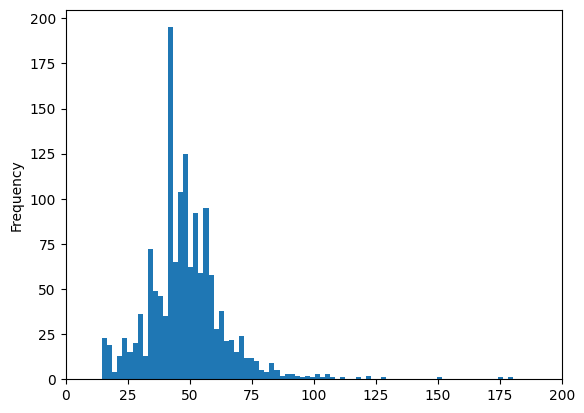

In [486]:
# Como muitos dos dados são nulos, e 'LotArea' nunca é nulo,
# podemos inputar o valor como sendo raiz da area menos 37%(os lotes no geral nao sao quadrados), + um valor punitivo de 30%, visto que o lote nao tem frente pra a rua
def LotFrontage_sqrt_area(df_base):
    #verificar quantos valores nulos temos e foram preenchidos com a funcao
    print('Valores nulos antes:', df_base.LotFrontage.isnull().sum())
    df_base.LotFrontage = df_base.LotFrontage.fillna(value= np.sqrt(df_base.LotArea)*0.63)*0.70
    print('Valores nulos depois:', df_base.LotFrontage.isnull().sum())
    return df_base.LotFrontage

LotFrontage_sqrt_area(df)
LotFrontage_sqrt_area(df_test)
df.LotFrontage.plot.hist(bins=100, xlim=(0,200))

O formato do histograma se mantem

#### FireplaceQu (690 nulos)


In [487]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fireplace
print_unique_values('FireplaceQu', df, df_test)

Coluna FireplaceQu preenchida com N/A em 690 entradas no dataset Treino
Coluna FireplaceQu preenchida com N/A em 730 entradas no dataset Teste


,FireplaceQu,Count,Price,Std,Area_Price,Std/Area
4,Ex,24,337712.500000,123611.471764,25.558705,24.159847
2,Gd,380,226351.415789,91123.148369,18.172309,6.217809
1,TA,313,205723.488818,71367.028772,16.818063,5.830221
3,Fa,33,167298.484848,34287.717564,15.268049,4.194353
0,N/A,690,141331.482609,44389.786884,16.453494,12.198844
5,Po,20,129764.150000,31080.842115,13.878667,9.125289


In [488]:
# Bater com a quantidade de lareiras: Fireplaces
print_unique_values('Fireplaces', df, df_test)

Coluna Fireplaces preenchida com N/A em 0 entradas no dataset Treino
Coluna Fireplaces preenchida com N/A em 0 entradas no dataset Teste


,Fireplaces,Count,Price,Std,Area_Price,Std/Area
3,3,5,252000.000000,93313.986090,11.010810,4.065301
2,2,115,240588.539130,117451.800525,12.010424,3.920378
1,1,650,211843.909231,79531.825318,19.644375,15.094903
0,0,690,141331.482609,44389.786884,16.453494,12.198844


Como há pouca representatividade de algumas categorias, pensamos em agrupá-las. Porém, vimos que a descrepancia de valor das colunas é altissimo.

        Ex	Excellent - Exceptional Masonry Fireplace - 337k Price
        Gd	Good - Masonry Fireplace in main level - 226k Price
        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement - 205k Price
        Fa	Fair - Prefabricated Fireplace in basement -  167k Price
        N/A - There is none - 141k Price
        Po	Poor - Ben Franklin Stove -  129k Price

Por isto, decidimos novamente por um map, avaliando os de acordo com a diferenca de valores

In [489]:
#map Fireplace
df['FireplaceQu'] = df['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

Electrical

In [490]:
print_unique_values('Electrical', df, df_test)

Coluna Electrical preenchida com N/A em 1 entradas no dataset Treino
Coluna Electrical preenchida com N/A em 0 entradas no dataset Teste


,Electrical,Count,Price,Std,Area_Price,Std/Area
0,SBrkr,1334,186825.113193,79856.458326,17.527542,7.687065
5,N/A,1,167500.000000,NaN,17.205958,NaN
2,FuseA,94,122196.893617,37511.376615,13.213028,11.231618
1,FuseF,27,107675.444444,30636.507376,12.802248,14.948553
3,FuseP,3,97333.333333,34645.827070,14.303909,16.784852
4,Mix,1,67000.000000,NaN,7.471841,NaN


In [491]:
#value counts de SalePrice
df.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
N/A      167500.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64

Mix, N/A e FuseP tem valores muito baixos, decidimos junta-los em N/A e considera-los como baixa qualidade.
<br/>
Como há uma relação direta de valor, fizemos um Map.

In [492]:
#FuseP e Mix viram N/A, antes do map
df.loc[df.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df.loc[df.Electrical == 'Mix', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'Mix', 'Electrical'] = 'N/A'

In [493]:
#map Electrical com N/A=0, FuseF=1, FuseA=2, SBrkr=3
df['Electrical'] = df['Electrical'].map({'N/A': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3})
df_test['Electrical'] = df_test['Electrical'].map({'N/A': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3})

Verificamos que os Valores de MasVnrType que sao nulos também tem MasVnrArea nulo, significando se tratar de um terreno que não contem essa caracteristica.
</br>
Podemos entao tratar este valor como None

In [494]:
#preencher com Nan MasVnrType e MasVnrArea
df.MasVnrType = df.MasVnrType.fillna('None')
df_test.MasVnrType = df_test.MasVnrType.fillna('None')
df.MasVnrArea = df.MasVnrArea.fillna(0)
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0)


In [495]:
#value counts MasVnrType
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [496]:
#value counts de SalePrice
df.groupby('MasVnrType')['SalePrice'].mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156958.243119
Stone      265583.625000
Name: SalePrice, dtype: float64

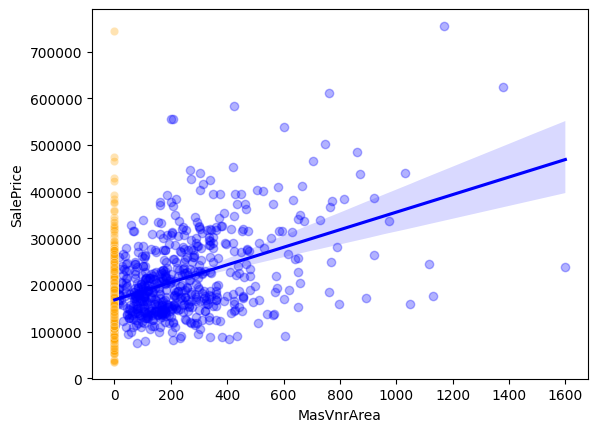

In [497]:
#plotar uma linha de tendencia desconsiderando o valor 0
sns.regplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea != 0], color= 'blue', scatter_kws={'alpha':0.3})
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea == 0], color= 'orange', alpha= 0.3)
plt.show()

Desconsiderando o valor 0, vimos que existe uma tendencia de alta do valor de casas de acordo com a Area.
</br>
Verificar como os materiais impactam neste valor, e se este impacto é maior que o impacto de area.

In [498]:
#verificar relacao entre MasVnrType, MasVnrArea
df.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.084862
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [499]:
#qual é a media total de MasVnrArea, desconsiderando os valores 0
df[df.MasVnrArea != 0]['MasVnrArea'].mean()

254.7394247038917

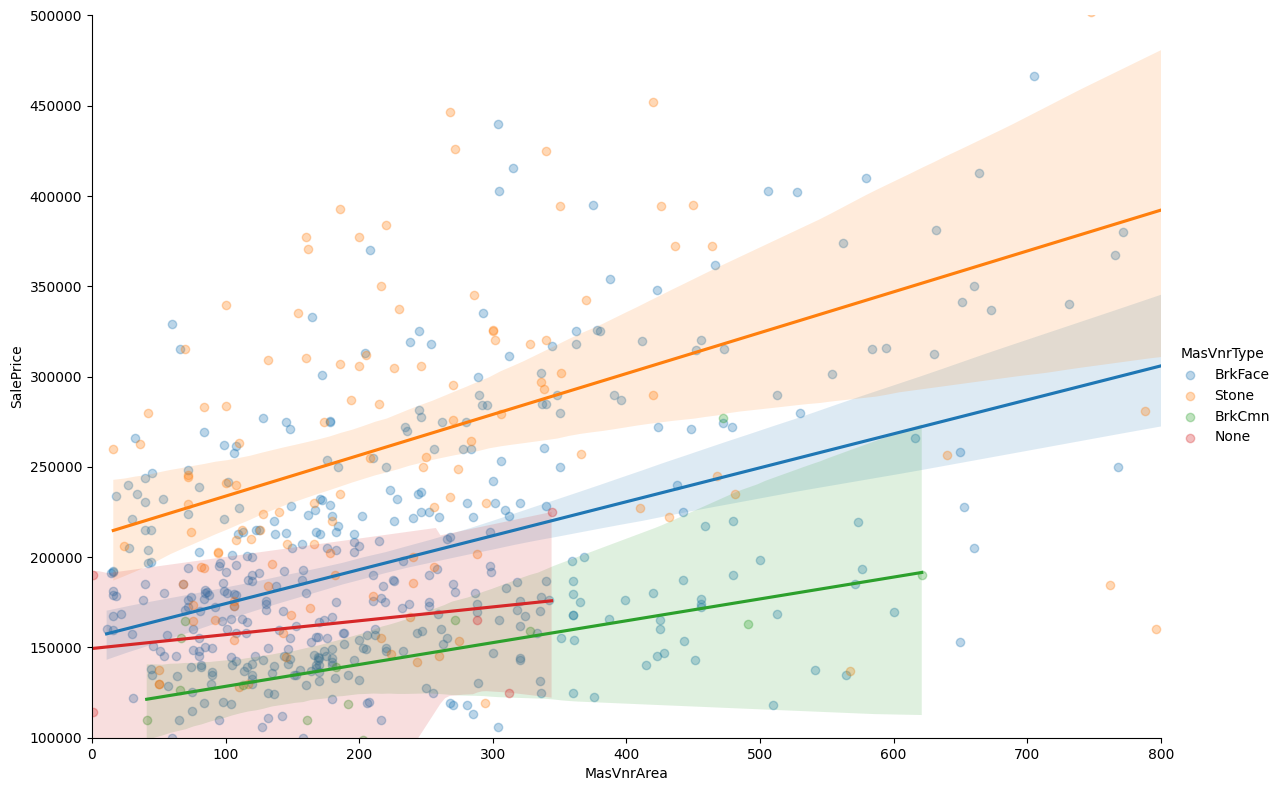

In [500]:
sns.lmplot(x= 'MasVnrArea', y= 'SalePrice', hue= 'MasVnrType', data= df[df.MasVnrArea != 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 800)
plt.ylim(100000, 500000)
plt.show()

In [501]:
#dividir o salesprice de casa de stone por 239, de brkcmn por 247, e de brkface por 259, e ver o resultado
print('Stone =',df[df.MasVnrType == 'Stone']['SalePrice'].mean() / 239.31)
print('BrkCmn =',df[df.MasVnrType == 'BrkCmn']['SalePrice'].mean() / 247.67)
print('BrkFace =',df[df.MasVnrType == 'BrkFace']['SalePrice'].mean() / 259.01)
#para termos uma comparacao, tambem dividiremos None pela media de todos os dados, sendo este 254.74
print('None =',df[df.MasVnrType == 'None']['SalePrice'].mean() / 254.74)

Stone = 1109.789081108186
BrkCmn = 590.7783206147967
BrkFace = 790.2855948037233
None = 616.1507541778521


Atraves dos graficos, e posterior analise, chegamos a conclusao que os materiais tem sim um grande impacto no valor da residencia, e que não se trata apenas de casas maiores/menores de materiais diferentes, com esta informação, fizemos um Map de MasVnrType, consideramos o Material mais barato, BrkCmn, com o mesmo valor de None

In [502]:
#map MasVnrType com N/A=0, BrkCmn=0, BrkFace=1, Stone=2
df['MasVnrType'] = df['MasVnrType'].map({'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})
df_test['MasVnrType'] = df_test['MasVnrType'].map({'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})

Tratamento de todas as variaveis Basement/Porao

BsmtQual: Evaluates the height of the basement

        Ex	Excellent (100+ inches)	
        Gd	Good (90-99 inches)
        TA	Typical (80-89 inches)
        Fa	Fair (70-79 inches)
        Po	Poor (<70 inches)
        NA	No Basement

In [503]:
#preencher NaN de BsmtQual
df.BsmtQual = df.BsmtQual.fillna('N/A')
df_test.BsmtQual = df_test.BsmtQual.fillna('N/A')

#value counts de BsmtQual
df.BsmtQual.value_counts()

TA     649
Gd     618
Ex     121
N/A     37
Fa      35
Name: BsmtQual, dtype: int64

BsmtCond: Evaluates the general condition of the basement

        Ex	Excellent
        Gd	Good
        TA	Typical - slight dampness allowed
        Fa	Fair - dampness or some cracking or settling
        Po	Poor - Severe cracking, settling, or wetness
        NA	No Basement

In [504]:
#preencher NaN de BsmtCond
df.BsmtCond = df.BsmtCond.fillna('N/A')
df_test.BsmtCond = df_test.BsmtCond.fillna('N/A')

#value counts de BsmtCond
df.BsmtCond.value_counts()

TA     1311
Gd       65
Fa       45
N/A      37
Po        2
Name: BsmtCond, dtype: int64

BsmtExposure: Refers to walkout or garden level walls

        Gd	Good Exposure
        Av	Average Exposure (split levels or foyers typically score average or above)	
        Mn	Mimimum Exposure
        No	No Exposure
        NA	No Basement

In [505]:
#preencher NaN de BsmtExposure
df.BsmtExposure = df.BsmtExposure.fillna('N/A')
df_test.BsmtExposure = df_test.BsmtExposure.fillna('N/A')

#value counts de BsmtExposure
df.BsmtExposure.value_counts()

No     953
Av     221
Gd     134
Mn     114
N/A     38
Name: BsmtExposure, dtype: int64

Rating of basement finished area. Applies to BsmtFinType1 and BsmtFinType2

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [506]:
#preencher NaN de BsmtFinType1
df.BsmtFinType1 = df.BsmtFinType1.fillna('N/A')
df_test.BsmtFinType1 = df_test.BsmtFinType1.fillna('N/A')

#value counts de BsmtFinType1
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
N/A     37
Name: BsmtFinType1, dtype: int64

In [507]:
#preencher NaN de BsmtFinType2
df.BsmtFinType2 = df.BsmtFinType2.fillna('N/A')
df_test.BsmtFinType2 = df_test.BsmtFinType2.fillna('N/A')

#value counts de BsmtFinType2
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
N/A      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Verificar se existe relação e se podemos excluir alguma das colunas, BsmtCond, BsmtExposure e BsmtQual

In [508]:
#print relacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice, individualmente, com sort values descending
print(df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtCond')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtExposure')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType2')['SalePrice'].mean().sort_values(ascending= False))


BsmtQual
Ex     327041.041322
Gd     202688.478964
TA     140759.818182
Fa     115692.028571
N/A    105652.891892
Name: SalePrice, dtype: float64
BsmtCond
Gd     213599.907692
TA     183632.620900
Fa     121809.533333
N/A    105652.891892
Po      64000.000000
Name: SalePrice, dtype: float64
BsmtExposure
Gd     257689.805970
Av     206643.420814
Mn     192789.657895
No     165652.295908
N/A    107938.342105
Name: SalePrice, dtype: float64
BsmtFinType1
GLQ    235413.720096
Unf    170670.576744
ALQ    161573.068182
LwQ    151852.702703
BLQ    149493.655405
Rec    146889.248120
N/A    105652.891892
Name: SalePrice, dtype: float64
BsmtFinType2
ALQ    209942.105263
Unf    184694.690287
GLQ    180982.142857
Rec    164917.129630
LwQ    164364.130435
BLQ    151101.000000
N/A    110346.236842
Name: SalePrice, dtype: float64


Através da analise acima, notamos que, no geral, a Qualidade tem muito mais peso do que o Exposure, porém, acreditamos que o modelo va calcular isto automaticamente.

In [509]:
df.groupby(['BsmtQual', 'BsmtExposure'])['SalePrice'].mean()

BsmtQual  BsmtExposure
Ex        Av              323434.571429
          Gd              393960.941176
          Mn              294542.000000
          No              283865.255814
Fa        Gd               61000.000000
          Mn              120260.000000
          No              116790.379310
Gd        Av              200928.385185
          Gd              225753.072464
          Mn              213302.629630
          N/A             192500.000000
          No              197349.147632
N/A       N/A             105652.891892
TA        Av              141620.666667
          Gd              183260.000000
          Mn              156684.804348
          No              136829.821839
Name: SalePrice, dtype: float64

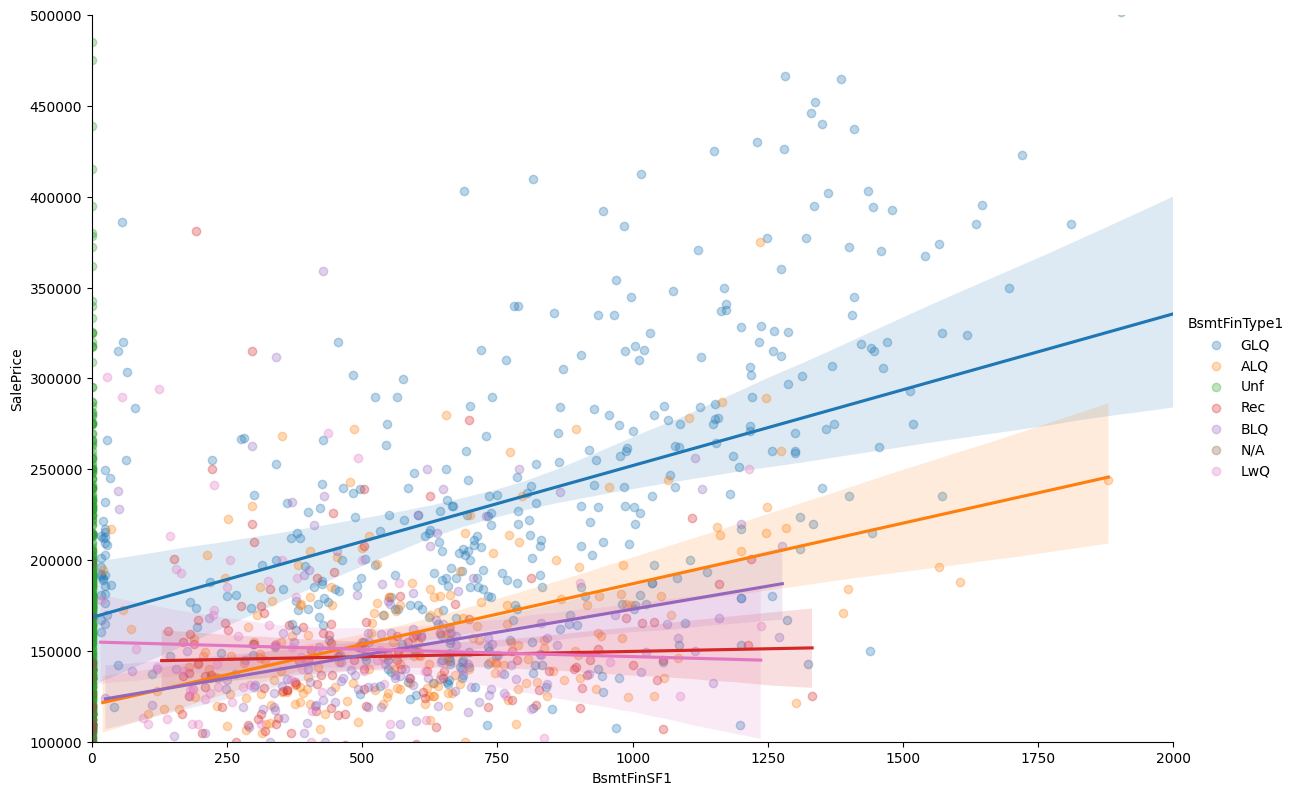

In [510]:
#grafico scatter plot de BsmtFinSF1 e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Casas com porao GLQ, ALQ e BLQ tem valor de mercado maior, sendo que quanto maior a area, maior o valor

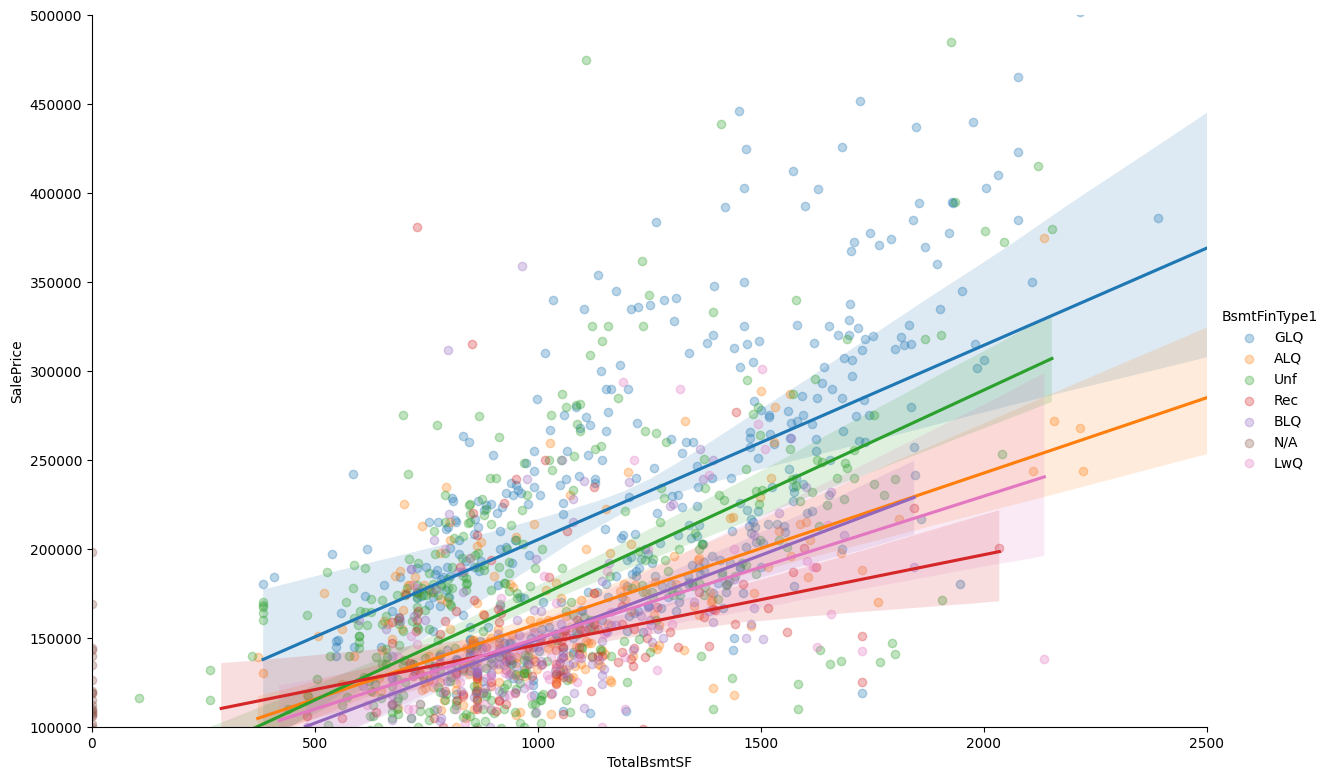

In [511]:
#grafico scatter plot de TotalBsmtSF e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'TotalBsmtSF', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2500)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Existem casas com type 1 unfinished, e type 2. Isto significa que não podemos eliminar nenhuma das variaveis sem utilizar tratamentos avançados.

Alguns materias tem valor significativamente superior aos outros considerando a area, nesse caso, o GLQ, o ALQ, e o BLQ, os demais tem valor semelhante indeferentemente da area construida.</br>
Por esta razao, decidimos dar as variaveis LwQ, Rec, o mesmo valor no map.

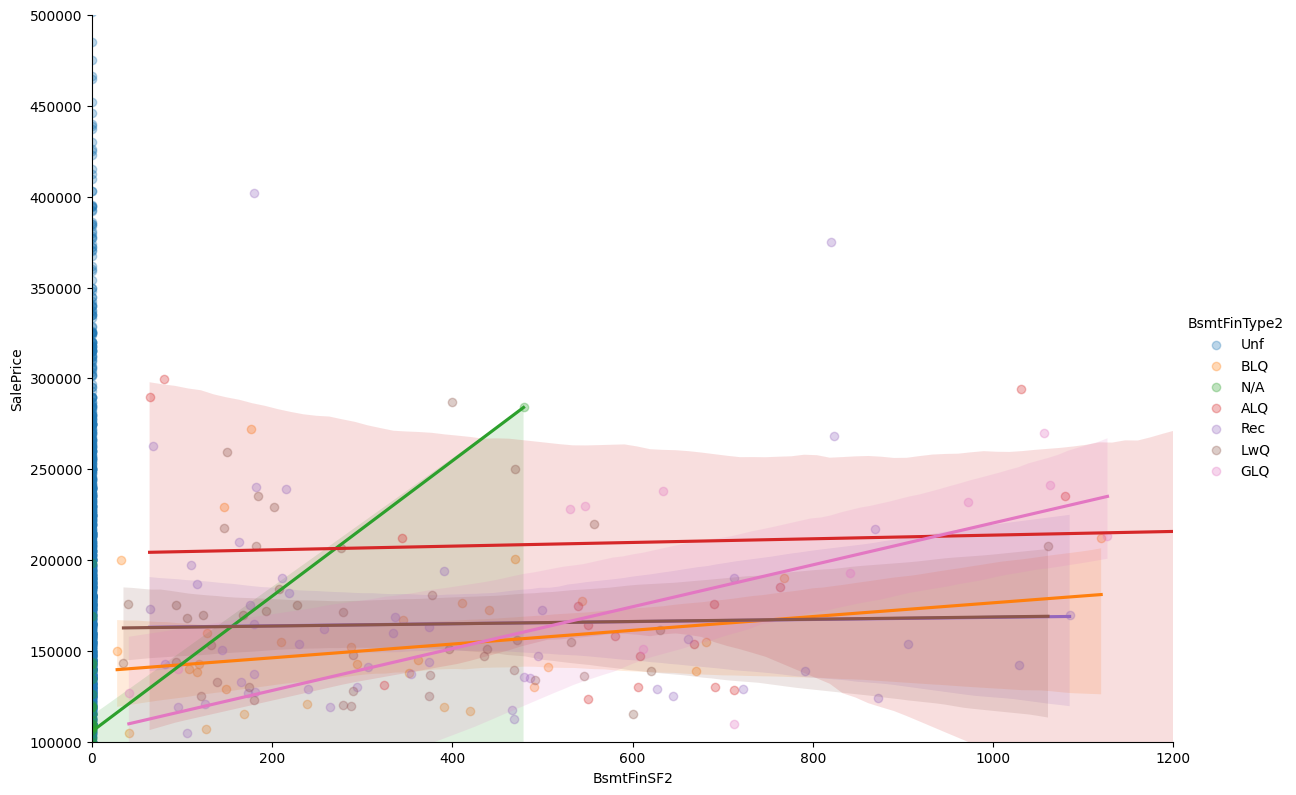

In [512]:
#plotar o mesmo grafico com BsmtFinSF2
sns.lmplot(x= 'BsmtFinSF2', y= 'SalePrice', hue= 'BsmtFinType2', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 1200)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Algumas casas nao tem um segundo porao, mas tem area finalizada de segundo porão. Inconsistencia no dataset!? </br>
Vale a pena levar em conta apenas um material, e utilizar apenas a area total?

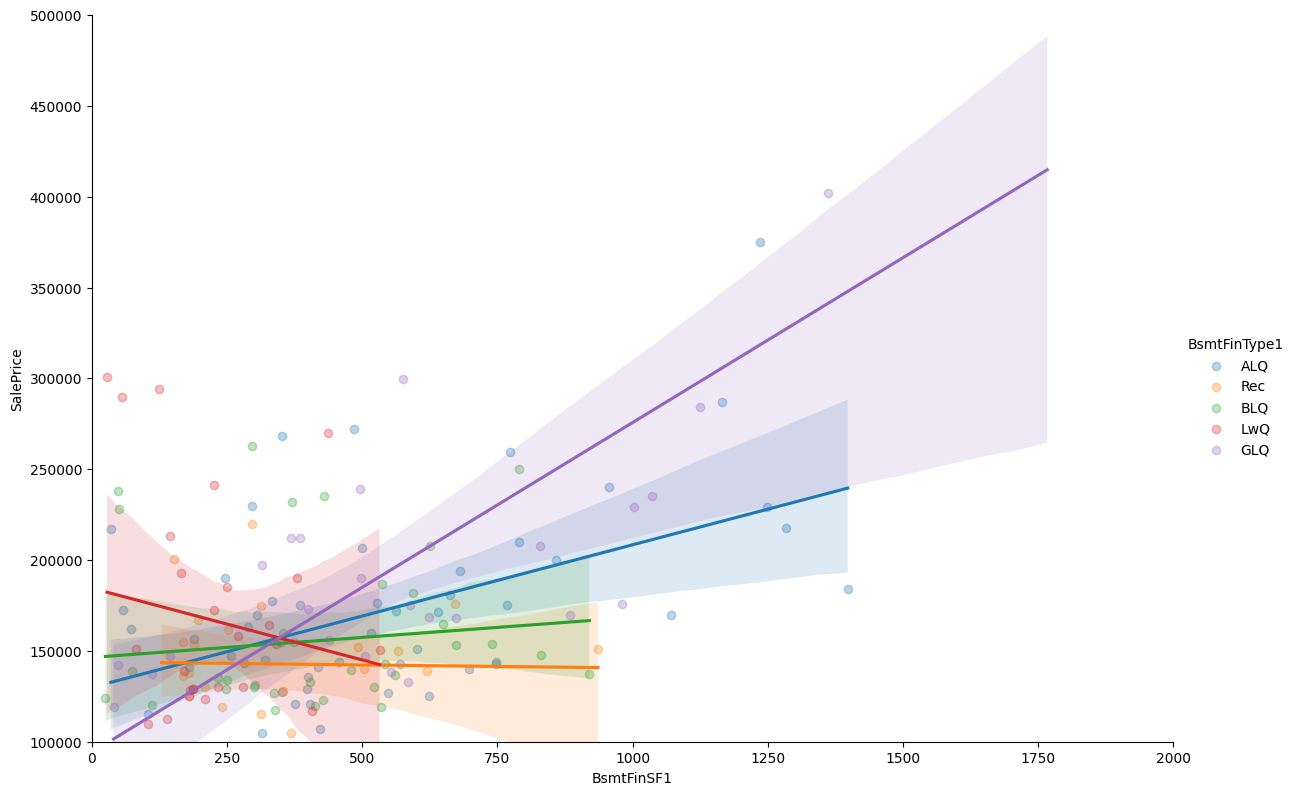

In [513]:
#grafico analisando o BsmtFinType1 apenas de casas com BsmtFinSf2 > 0
sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df[df.BsmtFinSF2 > 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Através das analises acima, chegamos na conclusao que ter um segundo porão afeta significativamente o preço da casa, Ter uma area para um segundo porao tambem afetam significamente o preço, mesmo q este nao esteja construido.Tambem chegamos a conclusao q podemos considerar Unfinished e N/A com o mesmo valor na criação de um MAP.

In [514]:
#map BsmtQual, BsmtCond, BsmtExposure, area1, area2, apenas em df
df['BsmtQual'] = df['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['BsmtCond'] = df['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df['BsmtExposure'] = df['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})

#map BsmtQual, BsmtCond, BsmtExposure, apenas em df_test
df_test['BsmtQual'] = df_test['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].map({'N/A': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5})

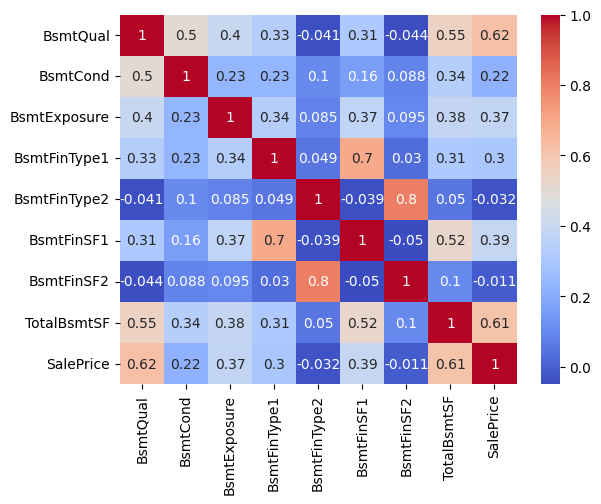

In [515]:
# #heatmap para verificar a correlacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice
sns.heatmap(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

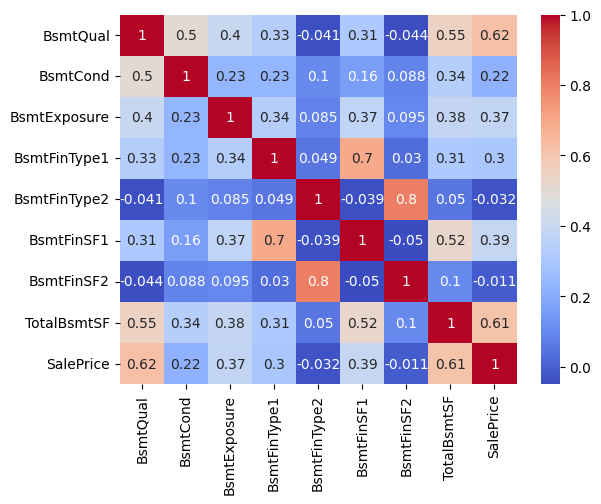

In [516]:
#heatmap para verificar a correlacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice
sns.heatmap(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

GARAGE

In [517]:
#preenchar Nan em todas as variaveis relacionadas a garagem
df.GarageType = df.GarageType.fillna('N/A')
df_test.GarageType = df_test.GarageType.fillna('N/A')

df.GarageYrBlt = df.GarageYrBlt.fillna(0)
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(0)

df.GarageFinish = df.GarageFinish.fillna('N/A')
df_test.GarageFinish = df_test.GarageFinish.fillna('N/A')

df.GarageQual = df.GarageQual.fillna('N/A')
df_test.GarageQual = df_test.GarageQual.fillna('N/A')

df.GarageCond = df.GarageCond.fillna('N/A')
df_test.GarageCond = df_test.GarageCond.fillna('N/A')

In [518]:
#value counts de GarageType
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
N/A         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [519]:
#value counts de GarageFinish
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
N/A     81
Name: GarageFinish, dtype: int64

In [520]:
#value counts de GarageQual
df.GarageQual.value_counts()

TA     1311
N/A      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [521]:
#value counts de GarageCond
df.GarageCond.value_counts()

TA     1326
N/A      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

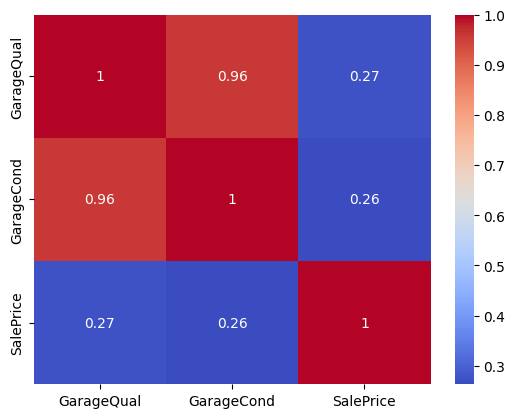

In [522]:
#map garage qual e cond
df['GarageQual'] = df['GarageQual'].map({'N/A': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df['GarageCond'] = df['GarageCond'].map({'N/A': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

#heatmap para verificar a correlacao entre GarageQual, GarageCond e SalePrice
sns.heatmap(df[['GarageQual', 'GarageCond', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

Drop Garage Cond

In [523]:
#drop garage Cond
df = df.drop(columns= 'GarageCond')
df_test = df_test.drop(columns= 'GarageCond')
remove_cols.add('GarageCond')

In [524]:
#garage type sales price
df.groupby('GarageType')['SalePrice'].mean().sort_values(ascending= False)

GarageType
BuiltIn    254751.738636
Attchd     202892.656322
Basment    160570.684211
2Types     151283.333333
Detchd     134091.162791
CarPort    109962.111111
N/A        103317.283951
Name: SalePrice, dtype: float64

In [525]:
#garage finish sales price
df.groupby('GarageFinish')['SalePrice'].mean().sort_values(ascending= False)

GarageFinish
Fin    240052.690341
RFn    202068.869668
Unf    142156.423140
N/A    103317.283951
Name: SalePrice, dtype: float64

In [526]:
#relacao de garage finish e garage type
df.groupby(['GarageType', 'GarageFinish'])['SalePrice'].mean()

GarageType  GarageFinish
2Types      Fin             168000.000000
            RFn             168350.000000
            Unf             134333.333333
Attchd      Fin             240705.985401
            RFn             202998.986523
            Unf             156669.097778
Basment     Fin             163250.000000
            RFn             157416.666667
            Unf             161482.555556
BuiltIn     Fin             266396.186441
            RFn             244449.083333
            Unf             166800.000000
CarPort     Unf             109962.111111
Detchd      Fin             143338.000000
            RFn             148024.263158
            Unf             132977.646893
N/A         N/A             103317.283951
Name: SalePrice, dtype: float64

Notamos que o estado da garagem(construido, quase terminado, ou inacabado) afeta significativamente o preço da casa.

O tipo de garagem também afeta, mas é menos "importante" em questão de impacto que seu estado. Acreditamos que o modelo conseguira avaliar isto.

In [527]:
#garagetype map
df['GarageType'] = df['GarageType'].map({'N/A': 0, 'CarPort': 0, 'Detchd': 1, 'Basment': 2, '2Types': 2, 'Attchd': 3, 'BuiltIn': 4})
df_test['GarageType'] = df_test['GarageType'].map({'N/A': 0, 'CarPort': 0, 'Detchd': 1, 'Basment': 2, '2Types': 2, 'Attchd': 3, 'BuiltIn': 4})

#garage finish map
df['GarageFinish'] = df['GarageFinish'].map({'N/A': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_test['GarageFinish'] = df_test['GarageFinish'].map({'N/A': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})


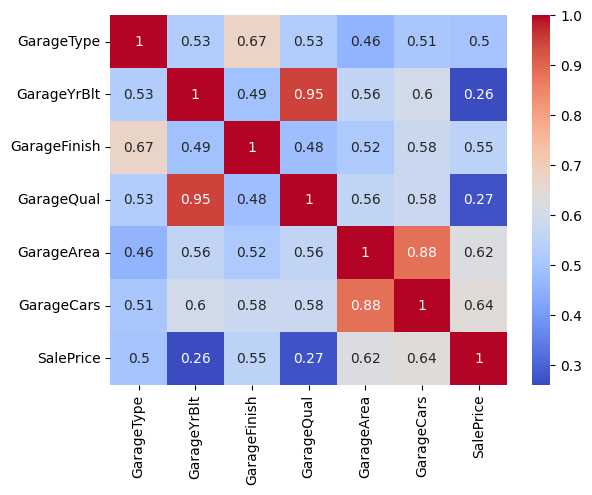

In [528]:
#heatmap tudo sobre garagem
sns.heatmap(df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageArea', 'GarageCars', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

<Axes: ylabel='Frequency'>

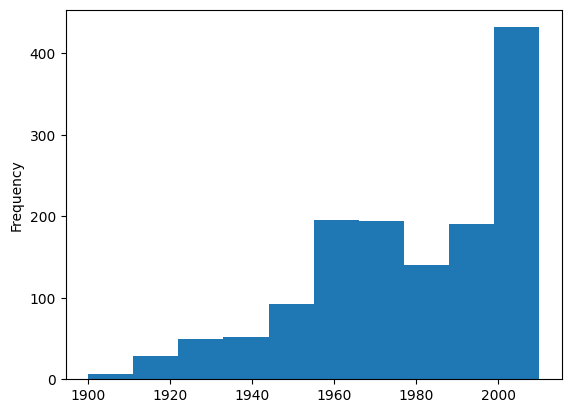

In [529]:
#distribuicao de garageyrblt, considerando apenas os valores maiores que 0
df[df.GarageYrBlt > 0]['GarageYrBlt'].plot.hist()

Tambem notamos uma correlacao gigantesca com a area/quantidade de carros, e com a Qualidade/Ano de construcao. Por isto, resolvemos remover a Qualidade, e a Quantidade de carros, visto que estes são dados menos significativos/com menor spread para o modelo.

In [530]:
#drop garageQual e garageCars
df = df.drop(columns= 'GarageQual')
df_test = df_test.drop(columns= 'GarageQual')
remove_cols.add('GarageQual')

df = df.drop(columns= 'GarageCars')
df_test = df_test.drop(columns= 'GarageCars')
remove_cols.add('GarageCars')

LOT

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [531]:
#LotShape value counts
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [532]:
#LotConfig value counts
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [533]:
#relacao entre LotShape e SalePrice
df.groupby('LotShape')['SalePrice'].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [534]:
#Relacao entre LotConfig e SalePrice
df.groupby('LotConfig')['SalePrice'].mean()

LotConfig
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
Name: SalePrice, dtype: float64

In [535]:
#Relacao entre LotShape e SalePrice/Area
df.groupby('LotShape')['SalePrice'].mean() / df.groupby('LotShape')['LotArea'].mean()

LotShape
IR1    17.327410
IR2    10.105200
IR3     5.226074
Reg    18.559917
dtype: float64

Inicialmente, O dataframe engana. Isso ocorre porque lotes irregulares tem valores maiores do que regulares, porém, isto ocorre porque eles sao consideravelmente maiores.

In [536]:
#map LotShape, com IR3 = 0, IR2 = 1, IR1 = 2, Reg = 3
df['LotShape'] = df['LotShape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
df_test['LotShape'] = df_test['LotShape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

O mesmo ocorre com LotConfig. Porem, fica um pouco mais dificil de avaliar, visto que neste caso, inumeras outras variaveis afetam os dados. Decidimos entao fazer um OneHotEnconding apos unir FR2 e FR3.

In [537]:
#Fr2 e Fr3 viram Fr23
df.loc[df.LotConfig == 'FR2', 'LotConfig'] = 'FR23'
df.loc[df.LotConfig == 'FR3', 'LotConfig'] = 'FR23'

df_test.loc[df_test.LotConfig == 'FR2', 'LotConfig'] = 'FR23'
df_test.loc[df_test.LotConfig == 'FR3', 'LotConfig'] = 'FR23'

In [538]:
#onehotenconding de lotconfig
df = pd.get_dummies(df, columns= ['LotConfig'], drop_first= True)
df_test = pd.get_dummies(df_test, columns= ['LotConfig'], drop_first= True)


In [539]:
#street value counts
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [540]:
#drop Street
df = df.drop(columns= 'Street')
df_test = df_test.drop(columns= 'Street')
remove_cols.add('Street')

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [541]:
#LandSlope value counts
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [542]:
#LandContour value counts
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [543]:
#land slope com sales price
df.groupby('LandSlope')['SalePrice'].mean()

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [544]:
#land contour com sales price
df.groupby('LandContour')['SalePrice'].mean()

LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

In [545]:
#map LandSlope
df['LandSlope'] = df['LandSlope'].map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

#map LandContour
df['LandContour'] = df['LandContour'].map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [546]:
#relacao entre LandSlope com SAlesprice/Area
df.groupby('LandSlope')['SalePrice'].mean() / df.groupby('LandSlope')['LotArea'].mean()

LandSlope
0     3.032246
1    13.293372
2    18.399916
dtype: float64

In [547]:
#Relacao entre LandContour com SAlesprice/Area
df.groupby('LandContour')['SalePrice'].mean() / df.groupby('LandContour')['LotArea'].mean()

LandContour
0     6.157508
1    15.167992
2    12.089670
3    18.666352
dtype: float64

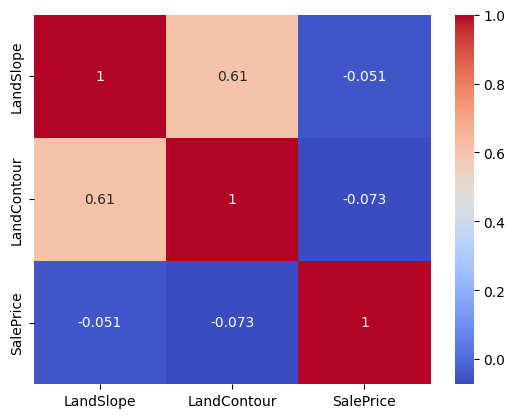

In [548]:
#heatmap LandSlope e LandContour
sns.heatmap(df[['LandSlope', 'LandContour', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

O heatmap engana, isso ocorre pq LandSlope e LandContour nao tem relacao com SalesPrice.

O problema aqui é que elas estão altamente relacionadas quando levamos em conta o SalePrice/Area

Dito isto, resolvemos fazer o MAP, mantendo os valores de acordo com sua definicao.

In [549]:
#Neighborhood count
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Neighborhood: Physical locations within Ames city limits

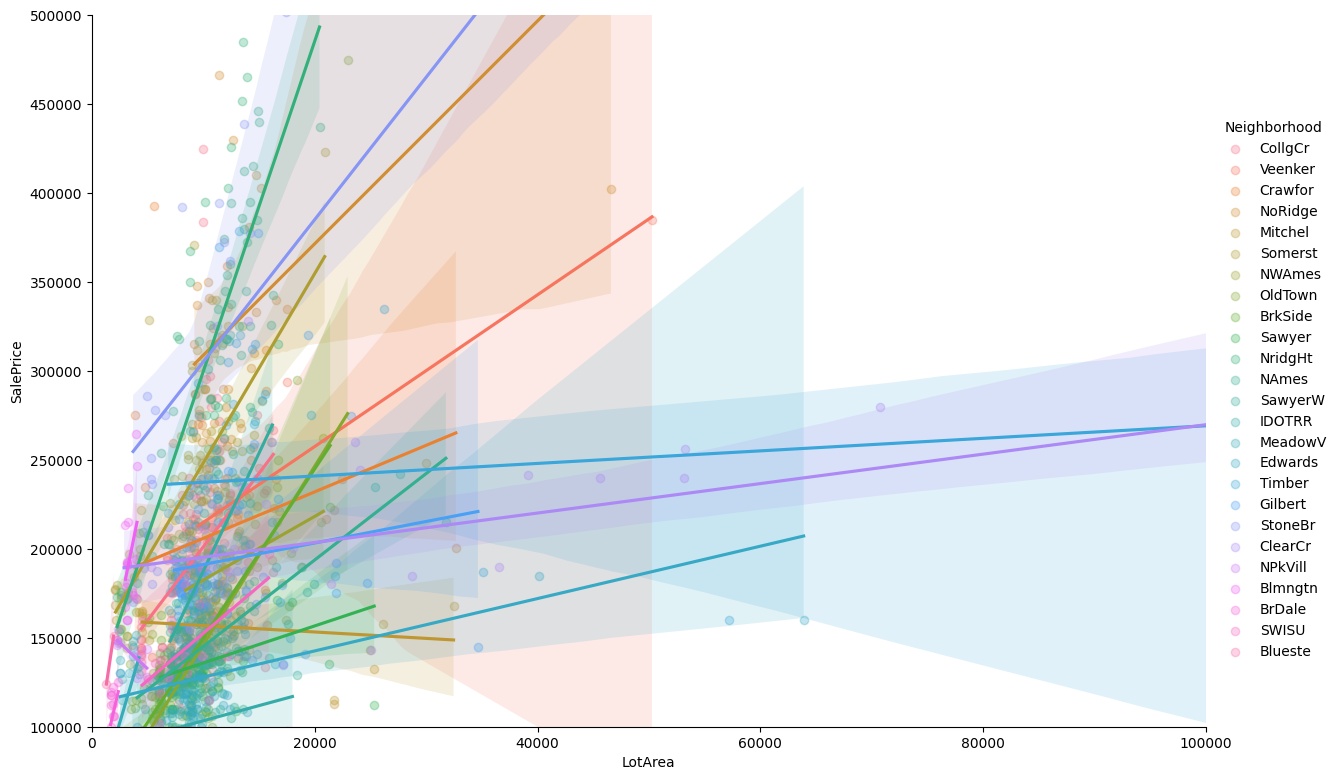

In [550]:
sns.lmplot(x= 'LotArea', y= 'SalePrice', hue= 'Neighborhood', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 100000)
plt.ylim(100000, 500000)
plt.show()

Algumas vizinhanças tem preços caros considerando o tamanho do lote, outras tem preços caros no geral. Utilizar OneHotEnconding é inviavel, visto que são 25 vizinhanças, e em caso de irmos para produção, teriamos ainda mais vizinhanças no futuro. Por isso, criaremos 4 novas categorias.

        Local Caro em Preço Nominal e Preço/Area - CpCa
        Local Caro em Preço Nominal e Barato em Preco/Area -  CpBa
        Local Barato em Preço Nominal e Caro em Preco/Area - BpCa
        Local Barato em Preco Nominal e Preco/Area - BpCa

In [551]:
#media de preços do dataset
df.SalePrice.mean()

180921.19589041095

In [552]:
#media de preco/area do dataset
df.SalePrice.mean() / df.LotArea.mean()

17.20301924463005

In [553]:
#criar variavel aux contendo bairros com media de preco/area acima da media do dataset
aux = df.groupby('Neighborhood')['SalePrice'].mean() / df.groupby('Neighborhood')['LotArea'].mean() > df.SalePrice.mean() / df.LotArea.mean()
#criar variavel aux contendo bairros com media de preco acima da media do dataset
aux2 = df.groupby('Neighborhood')['SalePrice'].mean() > df.SalePrice.mean()
#criar variavel com todos os bairros
aux3 = df.Neighborhood.unique()

In [554]:
#listar bairros que aparecem nas duas variaveis aux
CpCa = aux3[aux & aux2]

In [555]:
#listar bairros que aparecem em aux2 e nao em aux
CpBa = aux3[~aux & aux2]

In [556]:
#listar bairros que aparecem em aux e nao em aux2
BpCa = aux3[aux & ~aux2]

In [557]:
#listar bairros que nao aparecem em nenhuma das duas variaveis aux
BpBa = aux3[~aux & ~aux2]

In [558]:
#transformar valores dentro de Neighborhood em CpCa, CpBa, BpCa, BpBa, verificando se o valor da coluna se encontra dentro das variaveis aux
df['Neighborhood'] = np.where(df['Neighborhood'].isin(CpCa), 'CpCa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(CpBa), 'CpBa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(BpCa), 'BpCa', df['Neighborhood'])
df['Neighborhood'] = np.where(df['Neighborhood'].isin(BpBa), 'BpBa', df['Neighborhood'])

df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(CpCa), 'CpCa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(CpBa), 'CpBa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(BpCa), 'BpCa', df_test['Neighborhood'])
df_test['Neighborhood'] = np.where(df_test['Neighborhood'].isin(BpBa), 'BpBa', df_test['Neighborhood'])

In [559]:
#list
df.Neighborhood.value_counts()

BpBa    619
CpCa    489
BpCa    201
CpBa    151
Name: Neighborhood, dtype: int64

In [560]:
#Verificar a relacao entre Neighborhood e SalePrice
df.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
BpBa    166993.508885
BpCa    244717.681592
CpBa    135186.721854
CpCa    186450.950920
Name: SalePrice, dtype: float64

In [561]:
#verificar a relacao entre Neighborhood e SalePrice/Area
df.groupby('Neighborhood')['SalePrice'].mean() / df.groupby('Neighborhood')['LotArea'].mean()

Neighborhood
BpBa    14.948906
BpCa    22.572024
CpBa    16.429911
CpCa    18.168986
dtype: float64

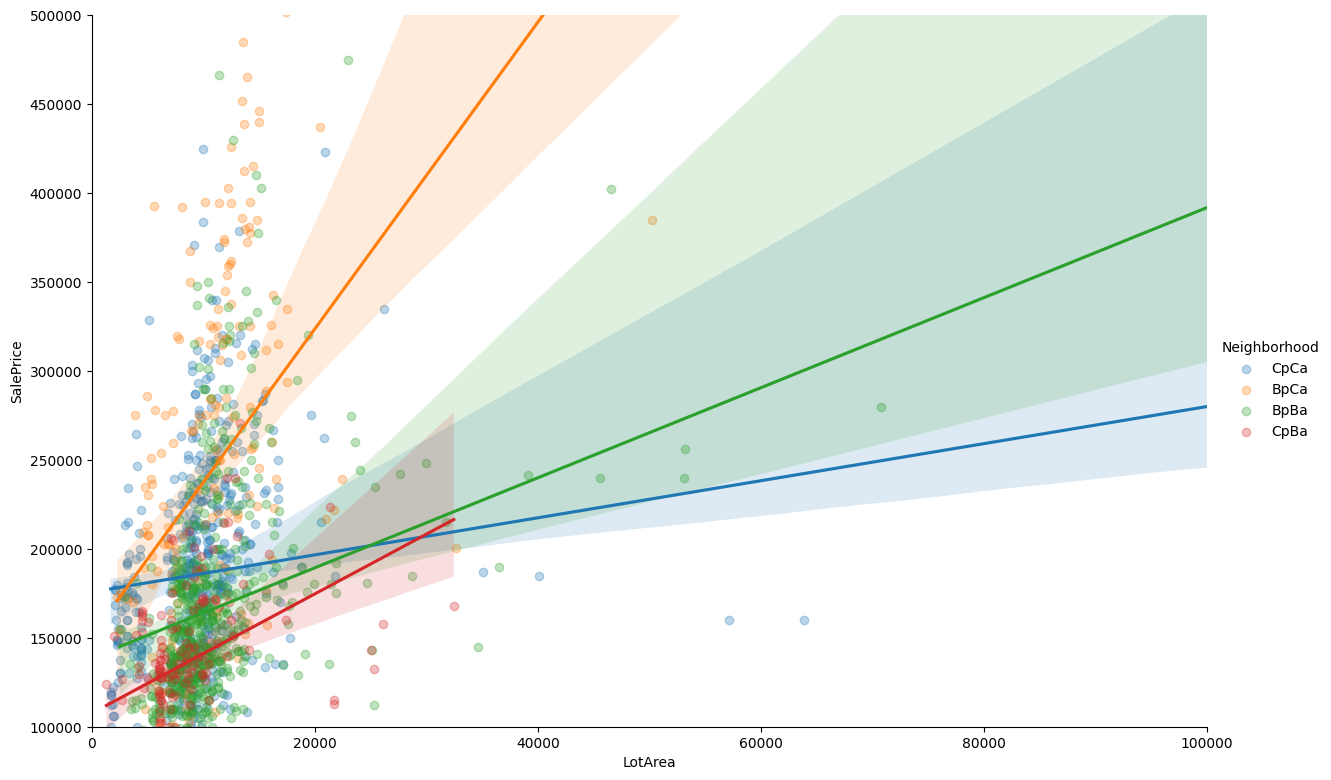

In [562]:
#scatterplot de SalesPrice e SalesPrice/Area, com hue de Neighborhood
sns.lmplot(x= 'LotArea', y= 'SalePrice', hue= 'Neighborhood', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 100000)
plt.ylim(100000, 500000)
plt.show()

In [563]:
#get dummies de Neighborhood
df = pd.get_dummies(df, columns= ['Neighborhood'], drop_first= True)
df_test = pd.get_dummies(df_test, columns= ['Neighborhood'], drop_first= True)


Condition1&2: Proximity to various conditions

In [564]:
#verificar Condition1 e 2
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [565]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [566]:
#verificar condition1 com salesprice
df.groupby('Condition1')['SalePrice'].mean()

Condition1
Artery    135091.666667
Feedr     142475.481481
Norm      184495.492063
PosA      225875.000000
PosN      215184.210526
RRAe      138400.000000
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
Name: SalePrice, dtype: float64

In [567]:
#verificar condition2 com salesprice
df.groupby('Condition2')['SalePrice'].mean()

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

In [568]:
#verificar dados que tenha condition1 e 2 iguais, sem que seja norm, mostrar apenas SalesPrice, Area, Condition1 e Condition2
df[(df.Condition2 != 'Norm') & (df.Condition1 != 'Norm')][['SalePrice', 'LotArea', 'Condition1', 'Condition2']]

,SalePrice,LotArea,Condition1,Condition2
Id,,,,
10,118000,7420,Artery,Artery
30,68500,6324,Feedr,RRNn
64,140000,10300,RRAn,Feedr
89,85000,8470,Feedr,Feedr
185,127000,7438,RRAn,Feedr
524,184750,40094,PosN,PosN
532,128000,6155,RRNn,Feedr
549,125000,8235,Feedr,RRNn
584,325000,13500,Artery,PosA


Decidimos por drop em Condition2

In [569]:
#dropar condition2
df = df.drop(columns= 'Condition2')
df_test = df_test.drop(columns= 'Condition2')
remove_cols.add('Condition2')

        Artery    135091.666667
        Feedr     142475.481481
        Norm      184495.492063
        PosA      225875.000000
        PosN      215184.210526
        RRAe      138400.000000
        RRAn      184396.615385
        RRNe      190750.000000
        RRNn      212400.000000

In [570]:
#map condition 1, agrupando categorias com valores proximos
df['Condition1'] = df['Condition1'].map({'Norm': 1, 'Feedr': 0, 'Artery': 0, 'RRAn': 1, 'RRAe': 1, 'RRNn': 2, 'RRNe': 0, 'PosN': 2, 'PosA': 2})
df_test['Condition1'] = df_test['Condition1'].map({'Norm': 1, 'Feedr': 0, 'Artery': 0, 'RRAn': 1, 'RRAe': 1, 'RRNn': 2, 'RRNe': 0, 'PosN': 2, 'PosA': 2})

In [571]:
#pavedDrive value counts

## Visualização de variáveis numéricas

In [572]:
# Verificar todas as colunas que possuem valores numericos, sendo eles inteiros, float, ou categoricos
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 55
Index(['LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LandSlope', 'Condition1', 'YearBuilt', 'YearRemodAdd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotArea_sqrt',
       'LotConfig_CulDSac', 'LotConfig_FR23', 'LotConfig_Inside',
       'Neighborhood_BpCa', 'Neighborhood_CpBa', 'Neighborhood_CpCa'],
      dtype='object')


In [573]:
# Verificar todas as colunas que possuem valores categoricos
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 23
Index(['MSSubClass', 'MSZoning', 'Utilities', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'Shed', 'SaleType', 'SaleCondition'],
      dtype='object')


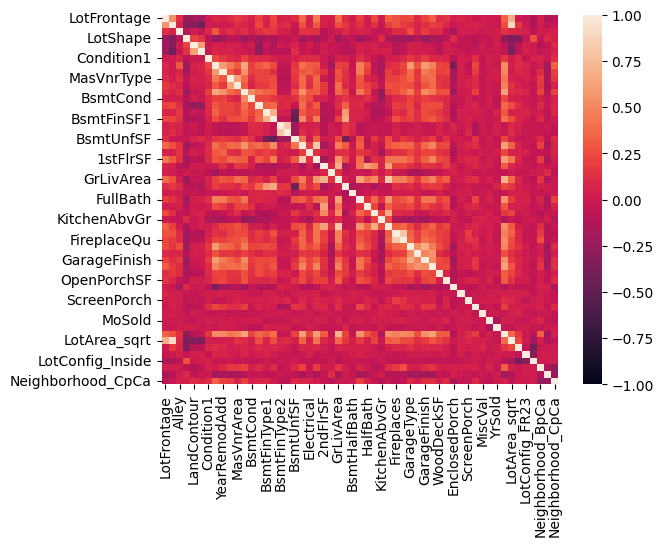

In [574]:
# Correlaçoes
_ = sns.heatmap(df[col_num].corr(), vmax= 1, vmin= -1)

In [575]:
# correlation matrix, with "Y-columns" as a column 'var1'
corr = df[col_num].corr().reset_index().rename(columns= {'index' : 'var1'})

# wide to long such as each row is: var1 - var2 - corr(var1, var2)
corr = corr.melt(id_vars= 'var1', var_name= 'var2')

# eliminar linhas da diagonal principal
corr = corr[corr.var1 != corr.var2]

# eliminar valores espelhados da matrix
corr[['var1', 'var2']] = corr.apply(
    lambda row: pd.Series(sorted(row[['var1', 'var2']])),
    axis=1
    )
corr = corr.drop_duplicates()

# Mostrar os valores com alta correlação
corr[np.abs(corr.value) > 0.8]

,var1,var2,value
103,LotArea,LotArea_sqrt,0.909303
897,BsmtFinSF2,BsmtFinType2,0.803070
1066,1stFlrSF,TotalBsmtSF,0.819530
1351,GrLivArea,TotRmsAbvGrd,0.825489
1793,FireplaceQu,Fireplaces,0.812340


In [576]:
# # Vamos dropar essas colunas com alta correlação
# # GarageYrBlt e GarageCars parecem menos relevantes
# df = df.drop(columns= ['GarageYrBlt', 'GarageCars'])
# remove_cols.update(['GarageYrBlt', 'GarageCars'])
# remove_cols

# Modelo de predição

In [577]:
#teste train split pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=0)

#Criar X_Cols com apenas colunas numericas
X_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train = X_train[X_cols]
X_test = X_test[X_cols]

#trocar NaN por 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [578]:
#criar pipeline Random Forest
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('', RandomForestRegressor())])

#treinar modelo
pipeline.fit(X_train, y_train)

#fazer previsões
y_pred = pipeline.predict(X_test)

#avaliar modelo
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print outras metricas


33235.425888002996


In [579]:
#log do erro
print(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))

0.14682721979574534


In [580]:
#describe saleprice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [581]:
#df head Exterior1st
df['Exterior1st'].head(20)

Id
1     VinylSd
2     MetalSd
3     VinylSd
4     Wd Sdng
5     VinylSd
6     VinylSd
7     VinylSd
8     HdBoard
9     BrkFace
10    MetalSd
11    HdBoard
12    WdShing
13    HdBoard
14    VinylSd
15    MetalSd
16    Wd Sdng
17    Wd Sdng
18    MetalSd
19    VinylSd
20    BrkFace
Name: Exterior1st, dtype: object

# Resultado do Desafio

In [582]:
#read test.csv
df_test = pd.read_csv('test.csv')

In [583]:
# #fazer previsao para test.csv, e escrever a resposta no arquivo csv
# df_test.fillna(0, inplace=True)
# y_pred_test = pipeline.predict(df_test[X_cols])
# #fill nan with 0

# df_test['SalePrice'] = y_pred_test

# df_test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

